In [94]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [101]:
# Load the data 
# Time that the boiler is on, the minimum temperature before and the maximum temperature after heating

df = pd.read_csv("hot_water_data.csv")
df['duration'] = df['duration'] / 60.0 #convert seconds to minutes

df = df[df['duration']<30]
#df = df.iloc[-150:]
df.head(10)

,duration,temp_before,temp_after
0,18.233333,21.50,34.75
1,13.850000,24.50,34.00
2,22.866667,21.00,33.00
3,13.900000,24.50,34.50
5,17.866667,23.25,33.50
6,0.516667,29.50,34.50
8,16.900000,22.25,33.75
9,20.900000,20.00,34.00
10,20.916667,19.75,34.00
11,16.900000,21.50,34.50


In [102]:
from lmfit import minimize, Parameters, fit_report, Model

from sklearn.metrics import mean_squared_error

In [103]:
%matplotlib notebook

In [104]:
df.head()

,duration,temp_before,temp_after
0,18.233333,21.50,34.75
1,13.850000,24.50,34.00
2,22.866667,21.00,33.00
3,13.900000,24.50,34.50
5,17.866667,23.25,33.50


<IPython.core.display.Javascript object>


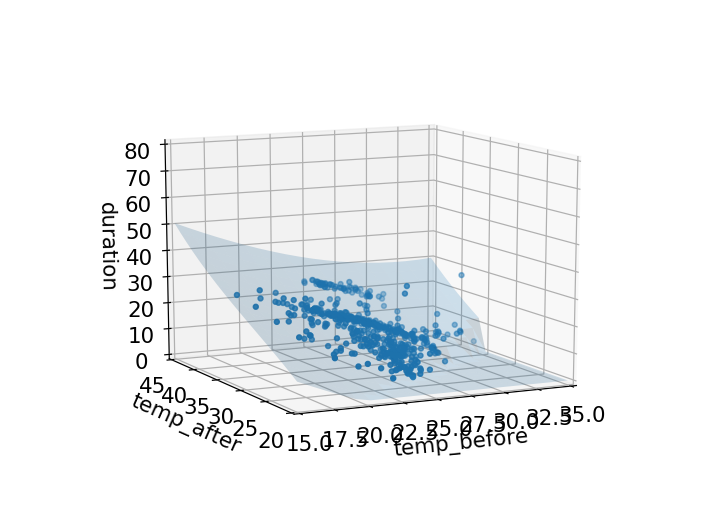

mean squared error 8.086463385822944


In [109]:
# multivariate linear regression. 

def modFn(x, a1, a2, a3,  b1, b2, b3, offset):
    out = a1*x['temp_before'] + a2*x['temp_before']**2 + a3*x['temp_before']**3 
    out += b1*x['temp_after'] + b2*x['temp_after']**2 + b3*x['temp_after']**3
    out += offset
    
    out[x['temp_before'] >= x['temp_after']] = 0
    out[out < 0] = 0
    #print out
    return out

p=Parameters()
p.add('a1', vary=True, value=0)
p.add('a2', vary=True, value=0)
p.add('a3', vary=True, value=0)
p.add('b1', vary=True, value=0)
p.add('b2', vary=True, value=0)
p.add('b3', vary=True, value=0)
p.add('offset', vary=True, value=0)

mod = Model(modFn)

result = mod.fit(df['duration'], p, x=df[['temp_before', 'temp_after']])
p = result.params


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot data
ax.scatter(df['temp_before'], df['temp_after'], df['duration'], s=10 )

#predict surface
X,Y = np.meshgrid(np.linspace(15,35,20), np.linspace(20,45,20))
A = pd.DataFrame(np.array([X.flatten(), Y.flatten()]).T, columns=['temp_before','temp_after'])  
Z = mod.eval(p, x=A)
Z = np.reshape(np.array(Z), np.shape(X))
ax.plot_surface(X,Y,Z,  alpha=0.2)



ax.set_xlim(15,35)
ax.set_ylim(20,45)
ax.set_zlim(0,80)

ax.set_xlabel('temp_before')
ax.set_ylabel('temp_after')
ax.set_zlabel('duration')


plt.show()

print "mean squared error",  mean_squared_error(df['duration'], mod.eval(p, x=df[['temp_before', 'temp_after']]))
result


<IPython.core.display.Javascript object>


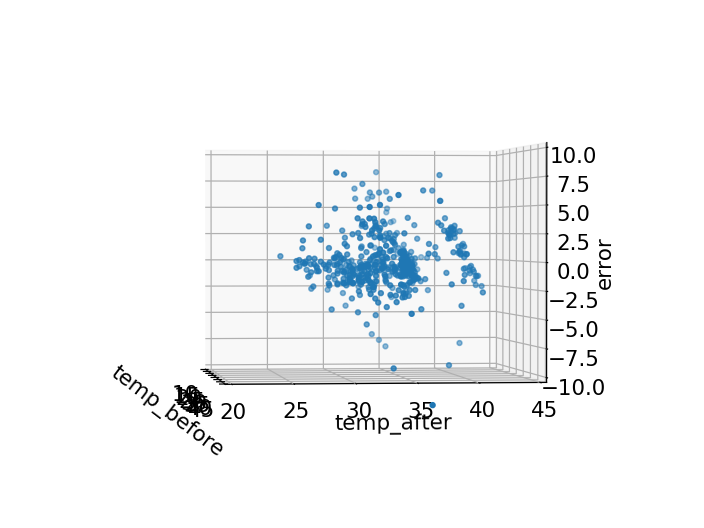

mean squared error 8.086463385822944


In [110]:
# multivariate linear regression. 



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot data
#ax.scatter(df['temp_before'], df['temp_after'], df['duration'], s=10 )

#predict surface
#X,Y = np.meshgrid(np.linspace(10,45,20), np.linspace(20,45,20))
#A = pd.DataFrame(np.array([X.flatten(), Y.flatten()]).T, columns=['temp_before','temp_after'])  
Z = mod.eval(p, x=df)

ax.scatter(df['temp_before'], df['temp_after'],  df['duration']-Z, s=10 )
#print Z
#Z = np.reshape(np.array(Z), np.shape(X))
#ax.plot_surface(X,Y,Z,  alpha=0.2)



ax.set_xlim(10,45)
ax.set_ylim(20,45)
ax.set_zlim(-10,10)
#ax.set_zlim(0,80)

ax.set_xlabel('temp_before')
ax.set_ylabel('temp_after')
ax.set_zlabel('error')


plt.show()

print "mean squared error",  mean_squared_error(df['duration'], mod.eval(p, x=df[['temp_before', 'temp_after']]))
result


In [40]:
A = pd.DataFrame([[25,32]], columns=['temp_before','temp_after'])  
mod.eval(p, x=A[['temp_before', 'temp_after']])


0    9.992954
Name: temp_before, dtype: float64